<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models(GMM)

**Gaussian Mixture Models (GMM)**

Gaussian Mixture Models (GMM) is a probabilistic clustering algorithm that assumes data points are generated from a mixture of several Gaussian distributions with unknown parameters. GMM assigns a probability to each data point for belonging to each cluster, making it a soft clustering technique. It is particularly useful when clusters have different shapes or densities

Cluster Labels: [0 0 0 0 0 1]
Cluster Probabilities:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


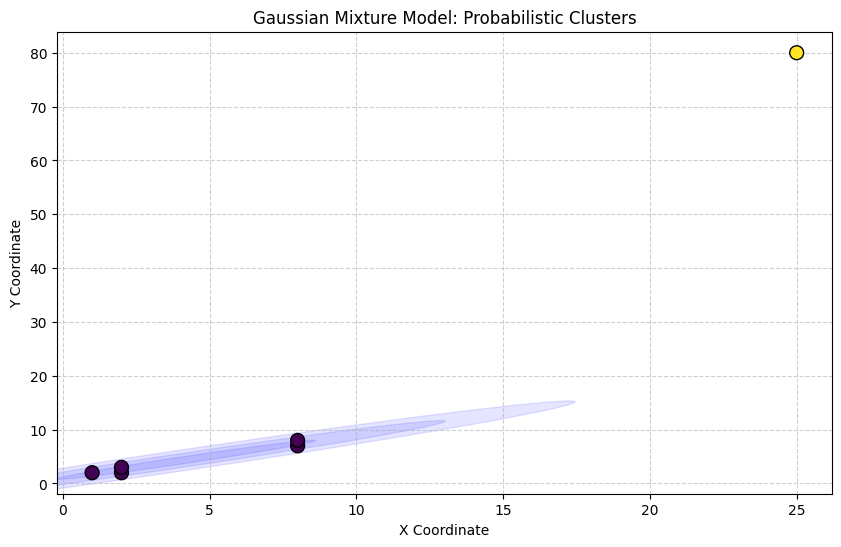

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 1. Sample data from your screenshot
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# 2. Initialize and fit the model
# n_components=2 assumes there are two underlying Gaussian distributions
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# 3. Get cluster labels and probabilities
labels = gmm.predict(X)
probs = gmm.predict_proba(X)

print("Cluster Labels:", labels)
print("Cluster Probabilities:\n", probs)

# --- Plotting Code ---
plt.figure(figsize=(10, 6))

# Plot the data points colored by their predicted cluster
# The 'c' parameter uses the labels for coloring
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis', zorder=3, edgecolors='black')

# Visualization of the Gaussian density regions
# For GMM, we often draw ellipses to show the distribution shape
ax = plt.gca()
for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
    v, w = np.linalg.eigh(covar)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi

    # Draw multiple levels of the Gaussian distribution
    for n_std in range(1, 4):
        ell = Ellipse(xy=mean, width=v[0]*n_std, height=v[1]*n_std,
                      angle=angle, color='blue', alpha=0.1)
        ax.add_artist(ell)

plt.title('Gaussian Mixture Model: Probabilistic Clusters')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()